# Содержание

1. [гистрограмма это график, где упорядочиваются цены от меньшего к  большему](#histo)
2. [столбчатые диаграммы](#bar-charts)
3. [Подсчет выручки по каждому году](#revenue-by-year)
4. [номера недель, на которых выручка в 1997 году была выше чем в 1998](#week_numbers)
5. [Еще два графика](#another_two)
6. [scatter task](#scatter_plot)



In [11]:
import pandas as pd
df_p = pd.read_csv("Pandas_data_for_course/Products.csv", sep=';')
df_c = pd.read_csv("Pandas_data_for_course/Customers.csv", sep=';')
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_od = pd.read_csv("Pandas_data_for_course/Order_details.csv", sep=';')
df_e = pd.read_excel("Pandas_data_for_course/Employees.xlsx")

array([[<Axes: title={'center': 'ProductID'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CategoryID'}>, <Axes: >]], dtype=object)

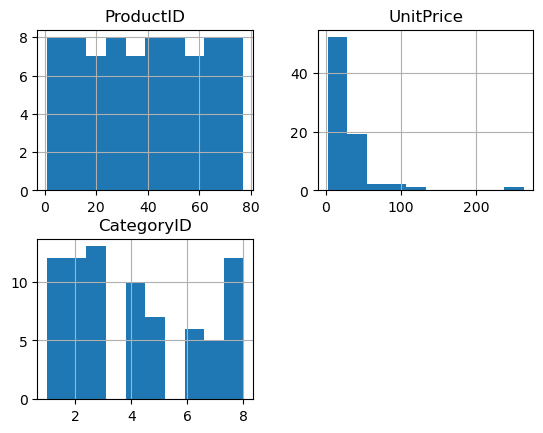

In [12]:
df_p.hist()

### гистрограмма это график, где упорядочиваются цены от меньшего к  большему
<a id="histo"></a>

<Axes: >

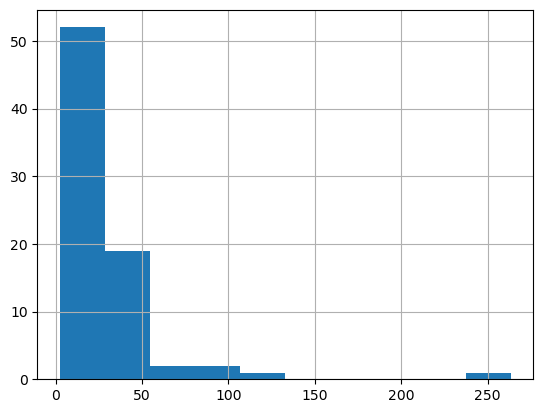

In [13]:
df_p["UnitPrice"].hist()

In [14]:
# Это то же чтто и гисторграмма выше. Но гистограмма представлена в виде графика
df_p['bins'] = pd.cut(df_p['UnitPrice'], bins=10)
df_p.groupby('bins', observed=False).ProductID.count() # count of products in each bin

bins
(2.239, 28.6]     52
(28.6, 54.7]      19
(54.7, 80.8]       2
(80.8, 106.9]      2
(106.9, 133.0]     1
(133.0, 159.1]     0
(159.1, 185.2]     0
(185.2, 211.3]     0
(211.3, 237.4]     0
(237.4, 263.5]     1
Name: ProductID, dtype: int64

<Axes: >

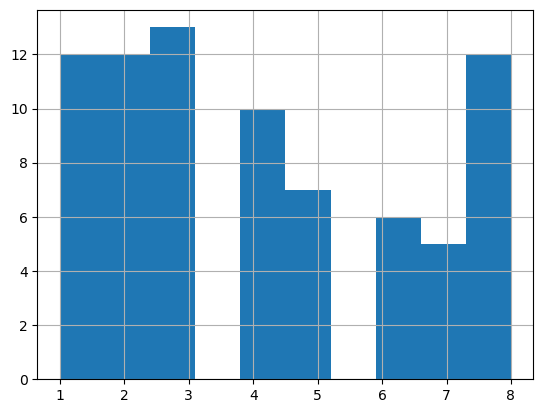

In [15]:
df_p['CategoryID'].hist()

In [16]:
df_p.groupby('CategoryID').ProductID.count()

CategoryID
1    12
2    12
3    13
4    10
5     7
6     6
7     5
8    12
Name: ProductID, dtype: int64

<Axes: >

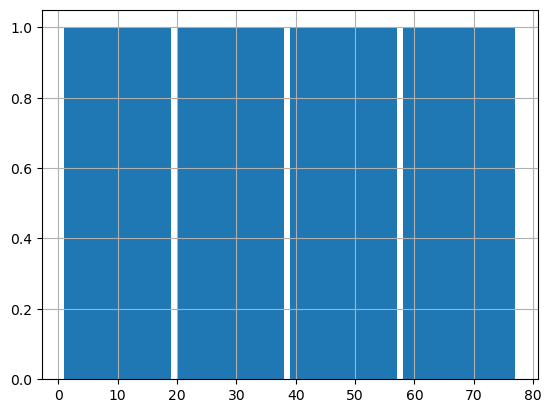

In [17]:
df_p['ProductID'].hist(bins=80) # пример не полезной гистограммы

In [18]:
df_c.hist() # будет ошибка так как там все столбцы с текстом

ValueError: hist method requires numerical or datetime columns, nothing to plot.

<Axes: >

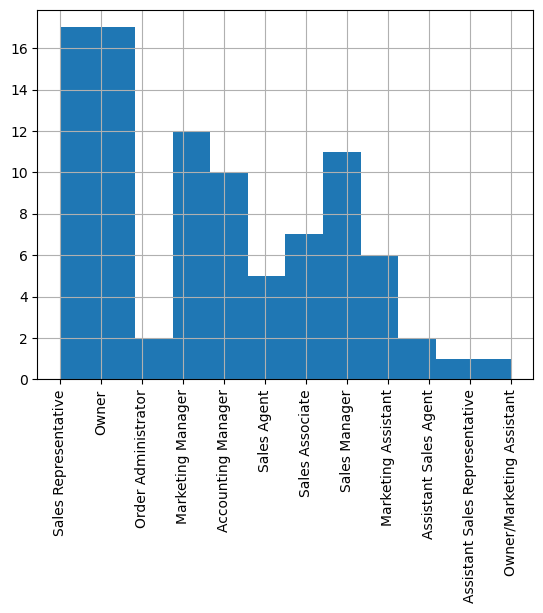

In [17]:
df_c['ContactTitle'].hist(xrot='vertical', bins=12)

In [19]:
# количество клиентов в разрезе должностей по сути тоже самое что и гистограмма выше
df_c.groupby("ContactTitle").CustomerID.count()

ContactTitle
Accounting Manager                10
Assistant Sales Agent              2
Assistant Sales Representative     1
Marketing Assistant                6
Marketing Manager                 12
Order Administrator                2
Owner                             17
Owner/Marketing Assistant          1
Sales Agent                        5
Sales Associate                    7
Sales Manager                     11
Sales Representative              17
Name: CustomerID, dtype: int64

<Axes: xlabel='ContactTitle'>

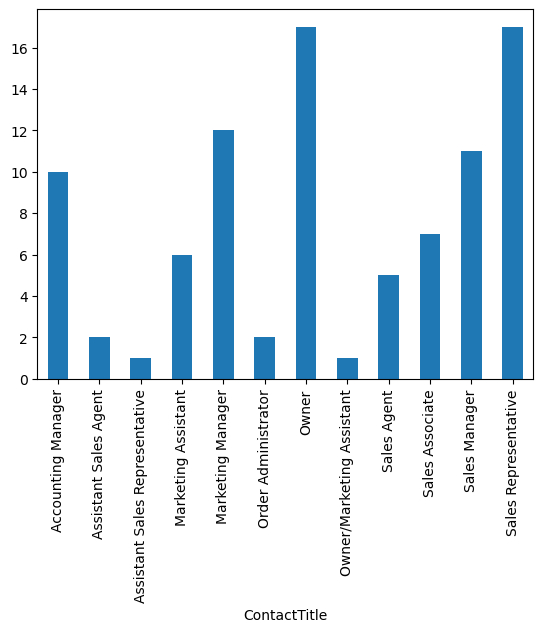

In [20]:
df_c.groupby('ContactTitle').CustomerID.count().plot(kind= 'bar')  # только с числовыми данными работает

# Постройте гистограмму для столбца EmployeeID. Сотрудник с каким ID оформил больше всего заказов за все время? Введите EmployeeID.


<Axes: >

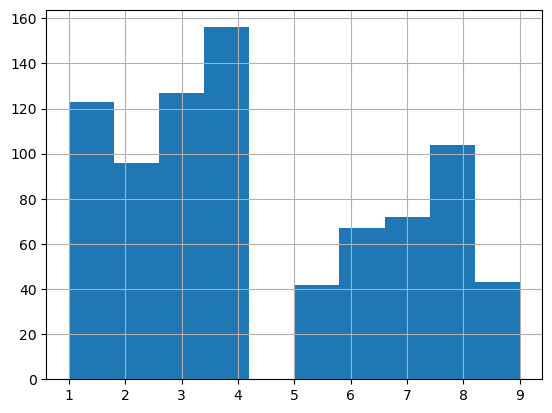

In [22]:
df_o['EmployeeID'].hist()

# Столбчатые диаграммы
<a id="bar-charts"></a>


In [23]:
import pandas as pd
df_p = pd.read_csv("Pandas_data_for_course/Products.csv", sep=';')
df_c = pd.read_csv("Pandas_data_for_course/Customers.csv", sep=';')
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_od = pd.read_csv("Pandas_data_for_course/Order_details.csv", sep=';')
df_e = pd.read_excel("Pandas_data_for_course/Employees.xlsx")


In [24]:
# меняю тип данных на дату
df_o['OrderDate'] = pd.to_datetime(df_o['OrderDate'])
df_o['RequiredDate'] = pd.to_datetime(df_o['RequiredDate'])
df_o['ShippedDate'] = pd.to_datetime(df_o['ShippedDate'])


In [25]:
# извлекаю месяц, год и неделю
df_o['month'] = df_o['OrderDate'].dt.month
df_o['year'] = df_o['OrderDate'].dt.year
df_o['week'] = df_o['OrderDate'].dt.isocalendar().week

In [27]:
# считаю вырочку очищенную от скидки
df_od['revenue'] = df_od['UnitPrice'] * df_od['Quantity'] * (1 - df_od['Discount'])
df_od_final = df_od.groupby('OrderID').revenue.sum().reset_index()

In [28]:
df_o = df_o.merge(df_od_final)

# Подсчет выручки по каждому году
<a id="revenue-by-year"></a>

<Axes: xlabel='year'>

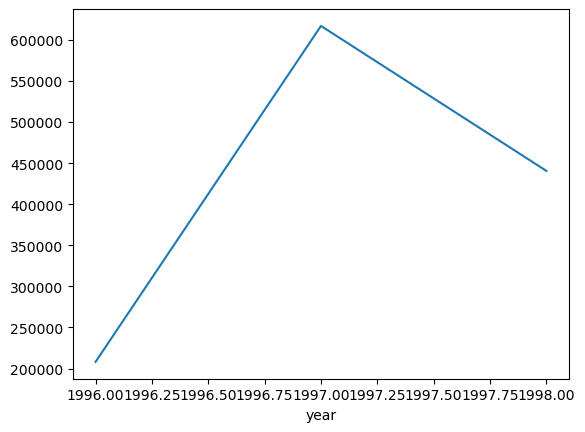

In [31]:
df_o.groupby('year').revenue.sum().plot() # по умолчанию линейный граффик

<Axes: xlabel='year'>

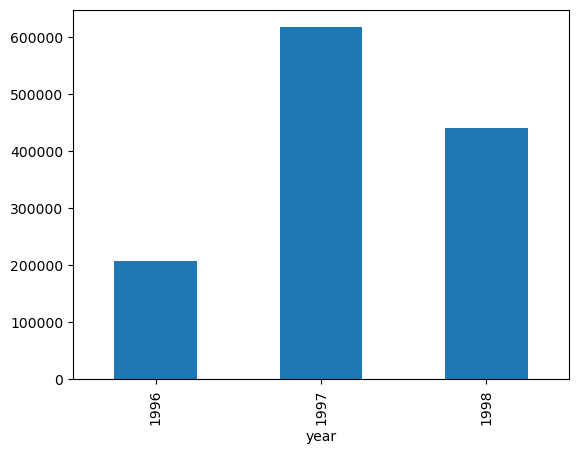

In [32]:
df_o.groupby('year').revenue.sum().plot(kind='bar') # столбчатая диаграмма

<Axes: xlabel='year,month'>

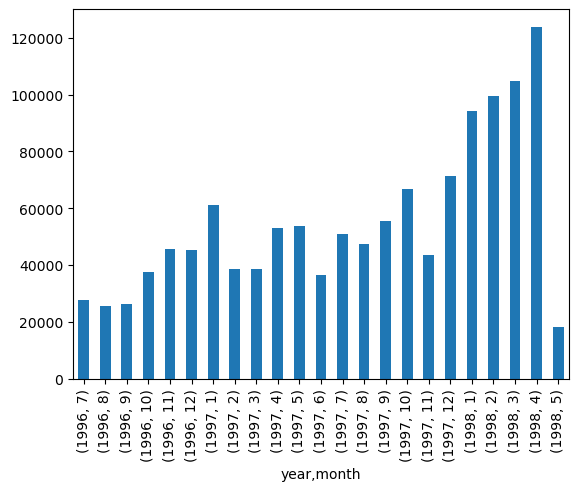

In [33]:
df_o.groupby(['year', 'month']).revenue.sum().plot(kind='bar')

In [46]:
# часто надо вывести не одну характеристику а две. например оборот за разные года и месяцы
df_o['year'] == 1997 # выбираю только 1997 год
df_o[df_o['year'] == 1997] # использую это как фильтр данных и выбираю только 1997 год
df_o[df_o['year'] == 1997].groupby('month').revenue.sum() # считаю оборот по месяцам(получаю серию)
df_o[df_o['year'] == 1997].groupby('month').revenue.sum().reset_index() # reset_index() преобразует серию в датафрейм
df_o_1997 = df_o[df_o['year'] == 1997].groupby('month').revenue.sum().reset_index() # сохраняю в переменную
df_o_1997

,month,revenue
0,1,61258.0700
1,2,38483.6350
2,3,38547.2200
3,4,53032.9525
4,5,53781.2900
5,6,36362.8025
6,7,51020.8575
7,8,47287.6700
8,9,55629.2425
9,10,66749.2260


In [48]:
df_o['year'] == 1998 # выбираю только 1998 год
df_o[df_o['year'] == 1998] # использую это как фильтр данных и выбираю только 1998 год
df_o[df_o['year'] == 1998].groupby('month').revenue.sum() # считаю оборот по месяцам(получаю серию)
df_o[df_o['year'] == 1998].groupby('month').revenue.sum().reset_index() # reset_index() преобразует серию в датафрейм
df_o_1998 = df_o[df_o['year'] == 1998].groupby('month').revenue.sum().reset_index() # сохраняю в переменную
df_o_1998

,month,revenue
0,1,94222.1105
1,2,99415.2875
2,3,104854.1550
3,4,123798.6825
4,5,18333.6305


In [50]:
df_o_1998.rename(columns={'revenue': 'revenue_1998'}, inplace=True) # переименовываю столбец
df_o_1997.rename(columns={'revenue': 'revenue_1997'}, inplace=True) # переименовываю столбец

In [51]:
df_o_1997.merge(df_o_1998, on='month') # объединяю два датафрейма по столбцу month и получаю не все месяца. так как в левой больше чем в правой

,month,revenue_1997,revenue_1998
0,1,61258.0700,94222.1105
1,2,38483.6350,99415.2875
2,3,38547.2200,104854.1550
3,4,53032.9525,123798.6825
4,5,53781.2900,18333.6305


In [55]:
df_o_final = df_o_1997.merge(df_o_1998, on='month', how='left') # объединяю два датафрейма по столбцу month и использую left так как мне нужны все столбцы из левого датафрейма

<Axes: >

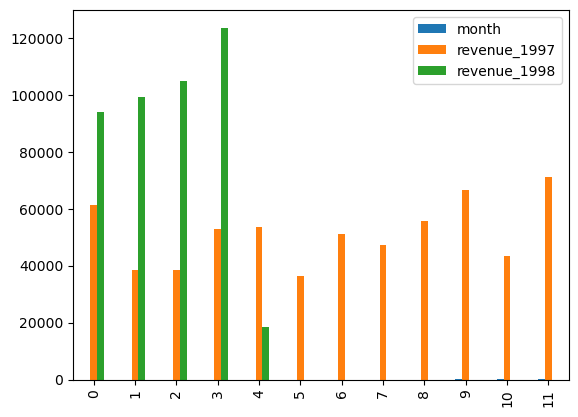

In [57]:
df_o_final.plot(kind='bar')

<Axes: xlabel='month'>

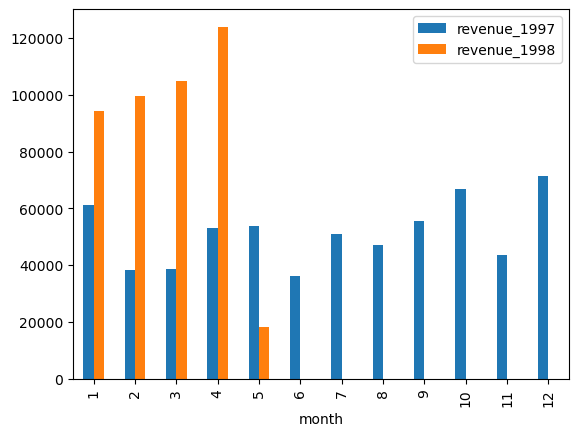

In [58]:
df_o_final.plot(kind='bar', x='month', y=['revenue_1997', 'revenue_1998'])

# номера недель, на которых выручка в 1997 году была выше чем в 1998.
<a id="week_numbers"></a>

<Axes: xlabel='week'>

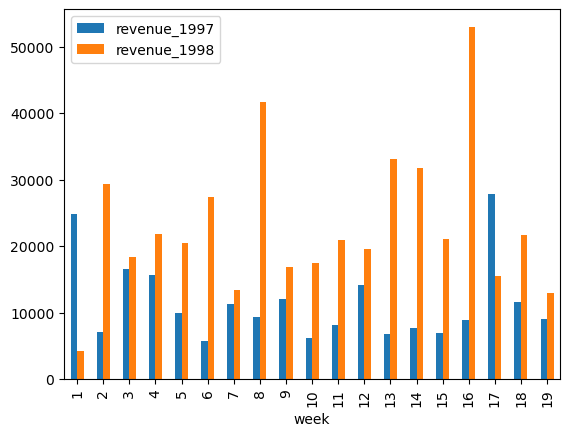

In [62]:
import pandas as pd
df_p = pd.read_csv("Pandas_data_for_course/Products.csv", sep=';')
df_c = pd.read_csv("Pandas_data_for_course/Customers.csv", sep=';')
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_od = pd.read_csv("Pandas_data_for_course/Order_details.csv", sep=';')
df_e = pd.read_excel("Pandas_data_for_course/Employees.xlsx")

# меняю тип данных на дату
df_o['OrderDate'] = pd.to_datetime(df_o['OrderDate'])
df_o['RequiredDate'] = pd.to_datetime(df_o['RequiredDate'])
df_o['ShippedDate'] = pd.to_datetime(df_o['ShippedDate'])

# извлекаю месяц, год и неделю
df_o['month'] = df_o['OrderDate'].dt.month
df_o['year'] = df_o['OrderDate'].dt.year
df_o['week'] = df_o['OrderDate'].dt.isocalendar().week

# считаю вырочку очищенную от скидки
df_od['revenue'] = df_od['UnitPrice'] * df_od['Quantity'] * (1 - df_od['Discount'])
df_od_final = df_od.groupby('OrderID').revenue.sum().reset_index()


df_o = df_o.merge(df_od_final)

df_o_1997 = df_o[df_o['year'] == 1997].groupby('week').revenue.sum().reset_index() # сохраняю в переменную
df_o_1998 = df_o[df_o['year'] == 1998].groupby('week').revenue.sum().reset_index() # сохраняю в переменную


df_o_1998.rename(columns={'revenue': 'revenue_1998'}, inplace=True) # переименовываю столбец
df_o_1997.rename(columns={'revenue': 'revenue_1997'}, inplace=True) # переименовываю столбец


df_o_final = df_o_1997.merge(df_o_1998, on='week', how='inner')

df_o_final.plot(kind='bar', x='week', y=['revenue_1997', 'revenue_1998'])

# Еще два графика
<a id="another_two"></a>

In [66]:
import pandas as pd
df_p = pd.read_csv("Pandas_data_for_course/Products.csv", sep=';')
df_c = pd.read_csv("Pandas_data_for_course/Customers.csv", sep=';')
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_od = pd.read_csv("Pandas_data_for_course/Order_details.csv", sep=';')
df_e = pd.read_excel("Pandas_data_for_course/Employees.xlsx")

In [68]:
# считаю вырочку очищенную от скидки
df_od['revenue'] = df_od['UnitPrice'] * df_od['Quantity'] * (1 - df_od['Discount'])
df_od_final = df_od.groupby('OrderID').revenue.sum().reset_index()
df_od_final.head()

,OrderID,revenue
0,10248,440.00
1,10249,1863.40
2,10250,1552.60
3,10251,654.06
4,10252,3597.90


In [70]:
df_o = df_o.merge(df_od_final)
df_o

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,revenue
0,10248,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38,440.0000
1,10249,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61,1863.4000
2,10250,HANAR,4,1996-07-08 00:00:00.000,1996-08-05 00:00:00.000,1996-07-12 00:00:00.000,65.83,1552.6000
3,10251,VICTE,3,1996-07-08 00:00:00.000,1996-08-05 00:00:00.000,1996-07-15 00:00:00.000,41.34,654.0600
4,10252,SUPRD,4,1996-07-09 00:00:00.000,1996-08-06 00:00:00.000,1996-07-11 00:00:00.000,51.30,3597.9000
...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05 00:00:00.000,1998-06-02 00:00:00.000,NaN,24.95,300.0000
826,11074,SIMOB,7,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,18.44,232.0850
827,11075,RICSU,8,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,6.19,498.1000
828,11076,BONAP,4,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,38.28,792.7500


# зависимость выручки от веса

<Axes: xlabel='revenue', ylabel='Freight'>

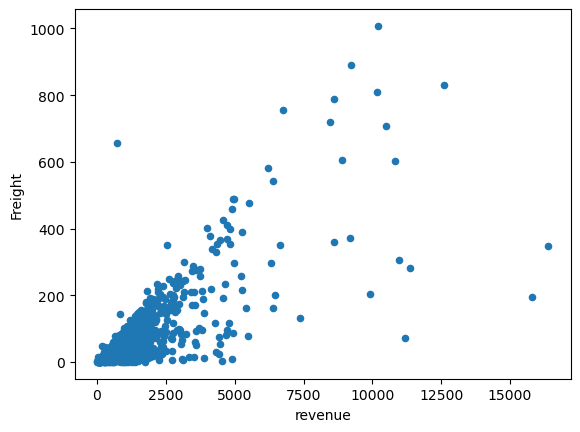

In [72]:
# предоложение что чем выше вес тем больше выручка
df_o.plot(kind='scatter', x='revenue', y='Freight')

<Axes: >

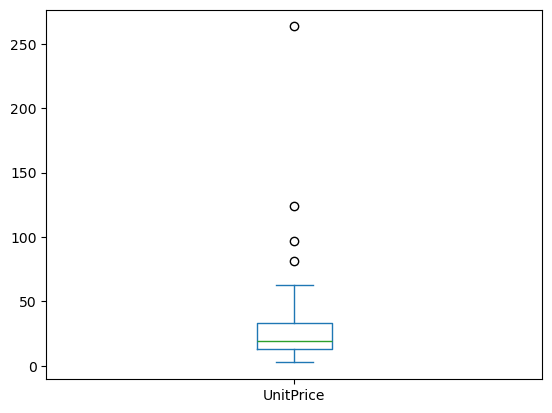

In [73]:
df_p['UnitPrice'].plot(kind='box')

In [78]:
df_p['bins'] = pd.qcut(df_p['UnitPrice'], 4)
df_p.groupby('bins', observed=False).ProductID.count()

bins
(2.499, 13.25]    20
(13.25, 19.5]     19
(19.5, 33.25]     19
(33.25, 263.5]    19
Name: ProductID, dtype: int64

In [79]:
df_p['UnitPrice'].describe()

count     77.000000
mean      28.866364
std       33.815111
min        2.500000
25%       13.250000
50%       19.500000
75%       33.250000
max      263.500000
Name: UnitPrice, dtype: float64

# task visualistion 
<a id="scatter_plot"></a>

<Axes: xlabel='revenue', ylabel='discount_fact'>

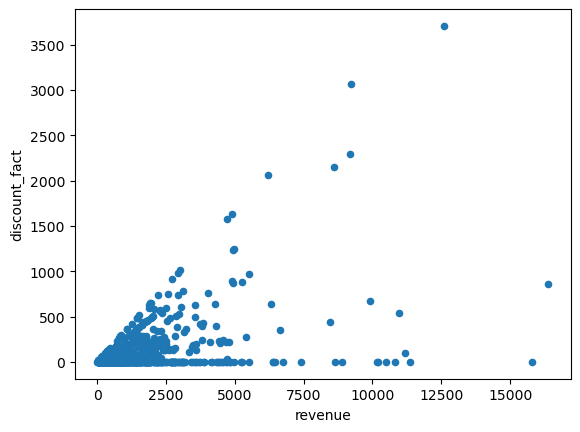

In [10]:
import pandas as pd
df_p = pd.read_csv("Pandas_data_for_course/Products.csv", sep=';')
df_c = pd.read_csv("Pandas_data_for_course/Customers.csv", sep=';')
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_od = pd.read_csv("Pandas_data_for_course/Order_details.csv", sep=';')
df_e = pd.read_excel("Pandas_data_for_course/Employees.xlsx")
df_od['revenue'] = df_od['UnitPrice'] * df_od['Quantity'] * (1 - df_od['Discount'])
df_od['discount_fact'] = df_od['UnitPrice'] * df_od['Quantity'] * df_od['Discount']

# df_od['revenue_clean']


df_od_final = df_od.groupby('OrderID').agg({'revenue': 'sum', 'discount_fact': 'sum'}).reset_index()
df_od_final.plot(kind='scatter', x='revenue', y='discount_fact')

<Axes: xlabel='Revenue', ylabel='DiscountFact'>

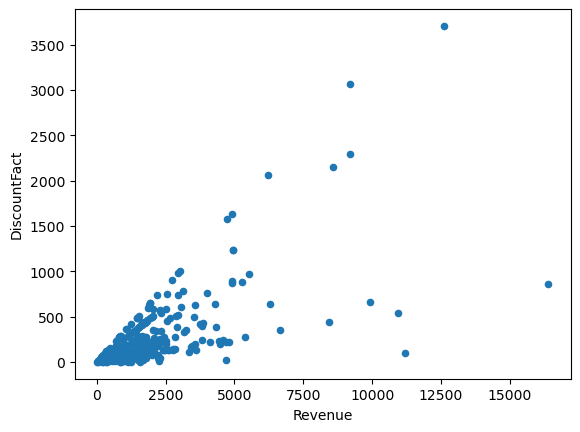

In [8]:
import pandas as pd
df_p = pd.read_csv("Pandas_data_for_course/Products.csv", sep=';')
df_c = pd.read_csv("Pandas_data_for_course/Customers.csv", sep=';')
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_od = pd.read_csv("Pandas_data_for_course/Order_details.csv", sep=';')
df_e = pd.read_excel("Pandas_data_for_course/Employees.xlsx")

df_od['DiscountFact'] = df_od['UnitPrice'] * df_od['Quantity'] * df_od['Discount'] #считаем фактическую скидку

df_od['Revenue'] = df_od['UnitPrice'] * df_od['Quantity'] * (1 - df_od['Discount']) #считаем чистую выручку

df_od2 = df_od.groupby('OrderID').agg({'Revenue':'sum', 'DiscountFact':'sum'}).reset_index() #группируем чистую выручку и фактическую скидку для каждого заказа

df_od2 = df_od2[df_od2['DiscountFact'] != 0] #исключаем строки, где фактическая скидка равно 0

df_od2.plot(kind='scatter', x='Revenue', y='DiscountFact') #строим график

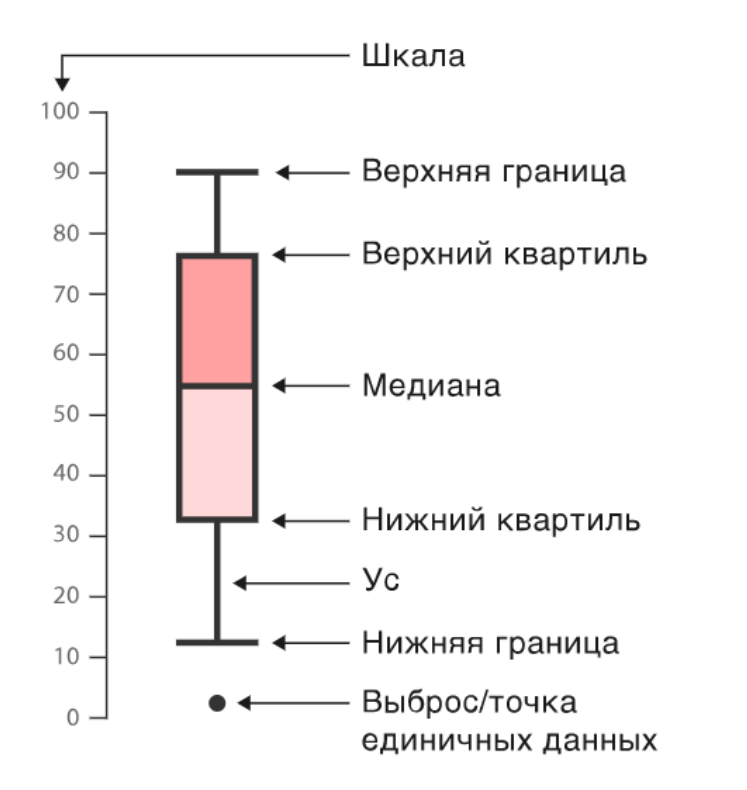

<Axes: >

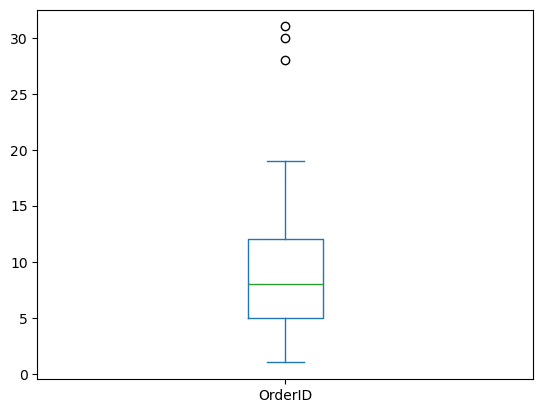

In [21]:
import pandas as pd
df_o = pd.read_csv("Pandas_data_for_course/Orders.csv", sep=';')
df_o.groupby('CustomerID').OrderID.count().plot(kind='box')